In [1]:
import os
os.chdir("/Users/raghavtandon/Documents/pathology_dynamics/ebm/ebm")

In [2]:
import pandas as pd
from ebm import mixture_model
from ebm import mcmc
from ebm import plotting
from ebm import datasets
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
xy_path = "/Users/raghavtandon/Documents/pathology_dynamics/multi-modal/data/XY_cnad.csv"

xy = pd.read_csv(xy_path, index_col="sbj")
X = xy.iloc[:,:75].to_numpy()
y = xy.iloc[:,-1].map({"Control":0, "AD":1}).to_numpy()
bmname = xy.columns.tolist()[:-1]
cname = ["CN", "AD"]

/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarni

/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarni

/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarni

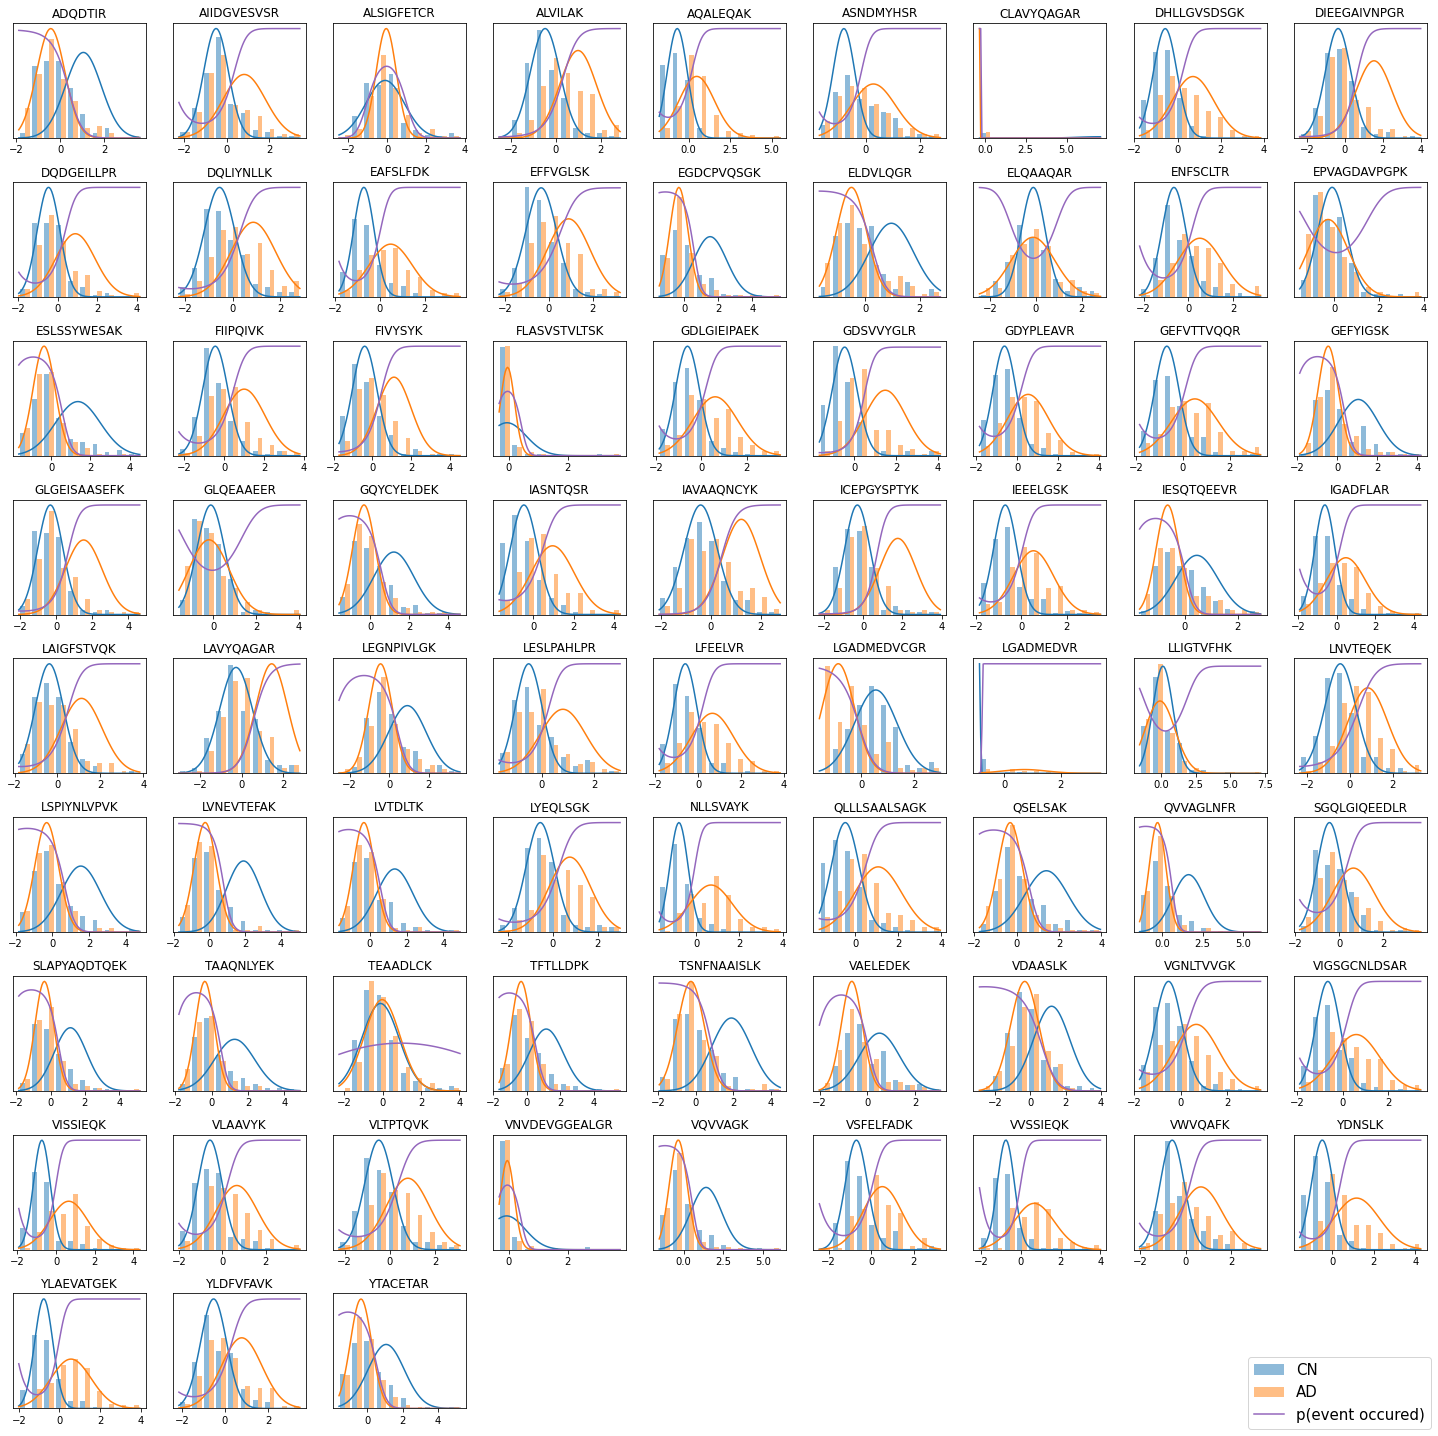

In [6]:
mixture_models = mixture_model.fit_all_gmm_models(X, y)

fig, ax = plotting.mixture_model_grid(X, y, mixture_models, score_names=bmname, class_names=cname)
fig.show()

/Users/raghavtandon/Documents/pathology_dynamics/ebm/ebm/ebm/mcmc/mcmc.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Time elapsed 100.86405801773071


<ipython-input-10-bb52ac391543>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


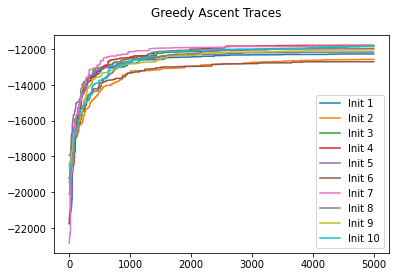

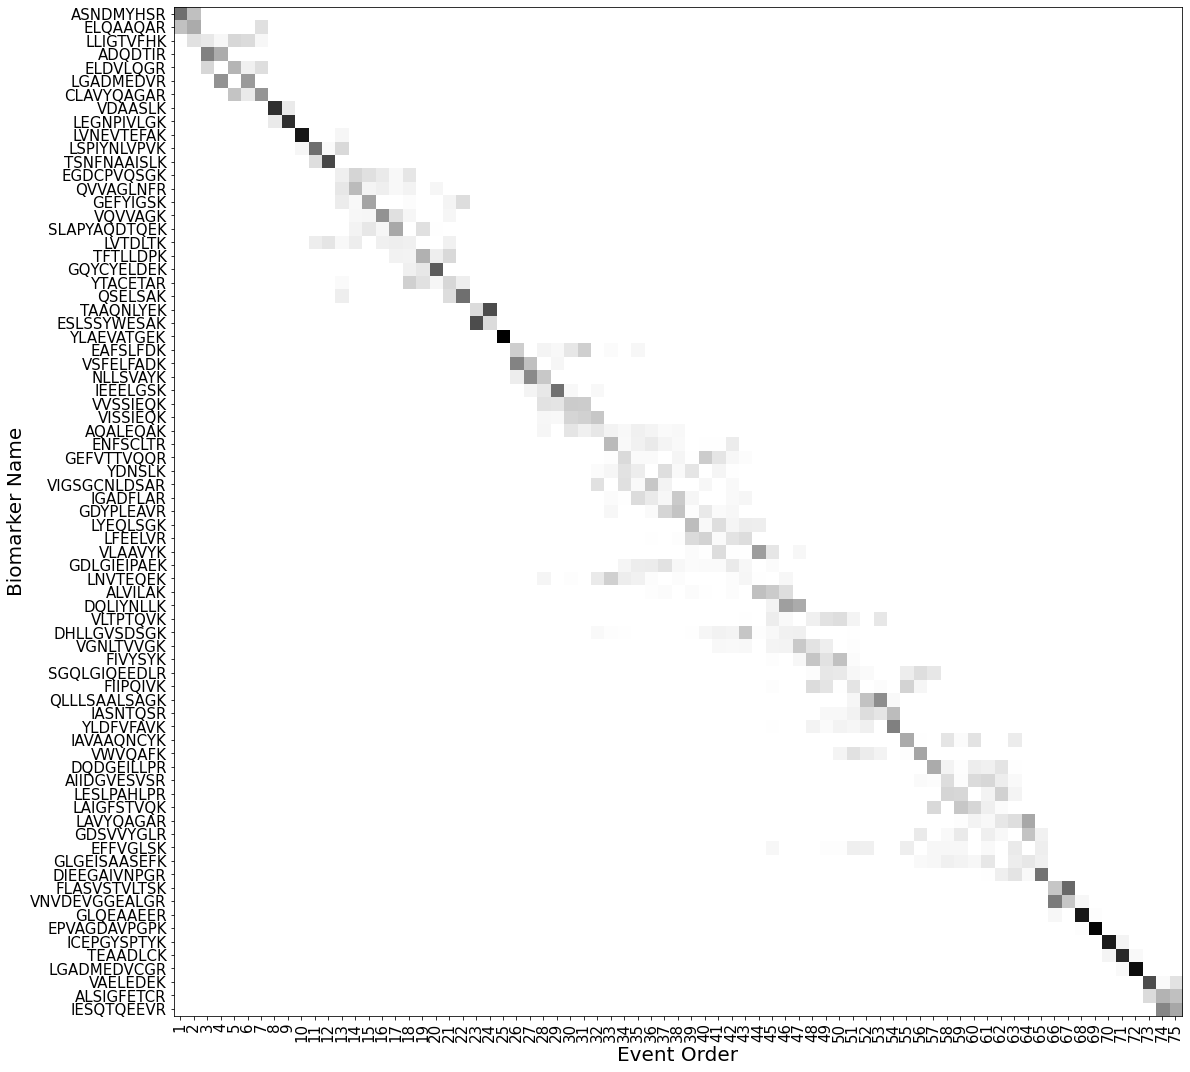

In [10]:
import time
a = time.time()
res = mcmc.mcmc(X, mixture_models, n_iter=10000, greedy_n_iter=5000, greedy_n_init=10)
b = time.time()
print("Time elapsed", b-a)
fig, ax = plotting.mcmc_uncert_mat(res, score_names=bmname)
fig.show()

/Users/raghavtandon/opt/miniconda3/envs/pathology_dynamics/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


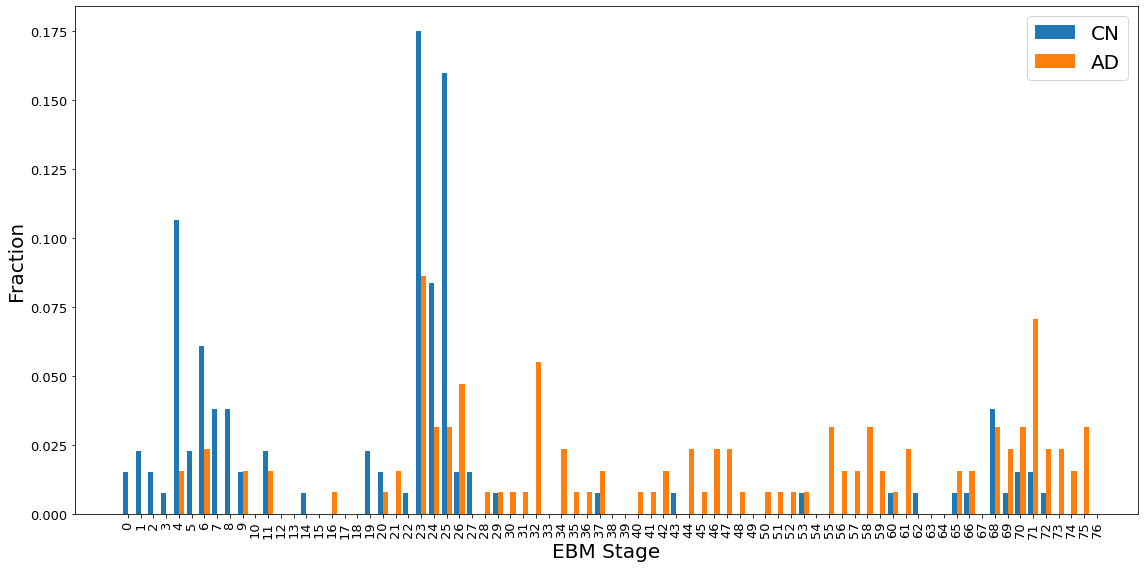

In [8]:
ml_order = res[0]

# Finally we can stage all our participants using the fitted EBM
prob_mat = mixture_model.get_prob_mat(X, mixture_models)
stages, stages_like = ml_order.stage_data(prob_mat)

fig, ax = plotting.stage_histogram(stages, y, )
plt.show()